## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
# x_train = x_train.reshape((len(x_train), -1))
# x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)



In [8]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[1],x_train.shape[2],x_train.shape[3]])
    x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(input_layer)
    x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(units=512, activation='relu')(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    x = keras.layers.Dropout(0.25)(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    model = keras.models.Model(inputs= [input_layer], outputs= [out])
    model.summary()
    return model
model = build_mlp()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2097664   
__________

In [9]:
"""
Compile 模型
"""
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam(lr=0.001))

In [10]:
"""
設定要訓練的 Epoch 數
"""
epochs = 500
model.fit(x_train, y_train, 
          epochs= epochs, 
          batch_size=512, 
          validation_data=(x_test, y_test), 
          verbose=1,
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.7901 - acc: 0.3352 - val_loss: 1.4009 - val_acc: 0.4882
Epoch 2/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.3743 - acc: 0.4993 - val_loss: 1.2070 - val_acc: 0.5705
Epoch 3/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1956 - acc: 0.5715 - val_loss: 1.1065 - val_acc: 0.6040
Epoch 4/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0682 - acc: 0.6208 - val_loss: 0.9841 - val_acc: 0.6541
Epoch 5/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.9653 - acc: 0.6606 - val_loss: 0.9196 - val_acc: 0.6765
Epoch 6/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.8642 - acc: 0.6963 - val_loss: 0.9269 - val_acc: 0.6764
Epoch 7/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.7959 - acc: 0.7232 - val_loss: 0.

50000/50000 [==============================] - 6s 118us/step - loss: 0.0495 - acc: 0.9840 - val_loss: 1.5339 - val_acc: 0.7171
Epoch 60/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0466 - acc: 0.9854 - val_loss: 1.5497 - val_acc: 0.7203
Epoch 61/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0485 - acc: 0.9843 - val_loss: 1.5926 - val_acc: 0.7157
Epoch 62/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0452 - acc: 0.9853 - val_loss: 1.5802 - val_acc: 0.7137
Epoch 63/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0551 - acc: 0.9819 - val_loss: 1.5762 - val_acc: 0.7130
Epoch 64/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0467 - acc: 0.9847 - val_loss: 1.5976 - val_acc: 0.7160
Epoch 65/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0506 - acc: 0.9832 - val_loss: 1.5391 - val_acc: 0.7184
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 119us/step - loss: 0.0286 - acc: 0.9903 - val_loss: 1.7782 - val_acc: 0.7169
Epoch 118/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0291 - acc: 0.9904 - val_loss: 1.8195 - val_acc: 0.7115
Epoch 119/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0314 - acc: 0.9899 - val_loss: 1.7375 - val_acc: 0.7207
Epoch 120/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0365 - acc: 0.9873 - val_loss: 1.6726 - val_acc: 0.7134
Epoch 121/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0288 - acc: 0.9909 - val_loss: 1.7657 - val_acc: 0.7199
Epoch 122/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0255 - acc: 0.9917 - val_loss: 1.7603 - val_acc: 0.7169
Epoch 123/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0311 - acc: 0.9899 - val_loss: 1.7172 - val_acc: 0.7147
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 6s 120us/step - loss: 0.0174 - acc: 0.9944 - val_loss: 1.8561 - val_acc: 0.7169
Epoch 176/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0179 - acc: 0.9941 - val_loss: 1.8865 - val_acc: 0.7183
Epoch 177/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0226 - acc: 0.9933 - val_loss: 1.8654 - val_acc: 0.7138
Epoch 178/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0191 - acc: 0.9942 - val_loss: 1.8448 - val_acc: 0.7141
Epoch 179/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0207 - acc: 0.9935 - val_loss: 1.8628 - val_acc: 0.7223
Epoch 180/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0288 - acc: 0.9909 - val_loss: 1.7935 - val_acc: 0.7194
Epoch 181/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0184 - acc: 0.9942 - val_loss: 1.8810 - val_acc: 0.7194
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 6s 121us/step - loss: 0.0177 - acc: 0.9946 - val_loss: 1.9173 - val_acc: 0.7219
Epoch 234/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0183 - acc: 0.9942 - val_loss: 1.9086 - val_acc: 0.7138
Epoch 235/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.0138 - acc: 0.9957 - val_loss: 1.9169 - val_acc: 0.7167
Epoch 236/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0148 - acc: 0.9950 - val_loss: 1.8648 - val_acc: 0.7181
Epoch 237/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.0139 - acc: 0.9952 - val_loss: 1.9939 - val_acc: 0.7097
Epoch 238/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0199 - acc: 0.9938 - val_loss: 1.8970 - val_acc: 0.7159
Epoch 239/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0211 - acc: 0.9935 - val_loss: 1.8359 - val_acc: 0.7178
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 6s 122us/step - loss: 0.0177 - acc: 0.9945 - val_loss: 1.8999 - val_acc: 0.7163
Epoch 292/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0136 - acc: 0.9960 - val_loss: 1.9518 - val_acc: 0.7214
Epoch 293/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0139 - acc: 0.9953 - val_loss: 1.9845 - val_acc: 0.7161
Epoch 294/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0149 - acc: 0.9954 - val_loss: 1.9679 - val_acc: 0.7144
Epoch 295/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0122 - acc: 0.9961 - val_loss: 1.9938 - val_acc: 0.7194
Epoch 296/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0115 - acc: 0.9965 - val_loss: 2.0240 - val_acc: 0.7167
Epoch 297/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.0140 - acc: 0.9955 - val_loss: 2.0168 - val_acc: 0.7163
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 6s 129us/step - loss: 0.0130 - acc: 0.9957 - val_loss: 2.1073 - val_acc: 0.7163
Epoch 350/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.0129 - acc: 0.9961 - val_loss: 1.9797 - val_acc: 0.7176
Epoch 351/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0121 - acc: 0.9965 - val_loss: 2.0102 - val_acc: 0.7184
Epoch 352/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0101 - acc: 0.9969 - val_loss: 2.0233 - val_acc: 0.7211
Epoch 353/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0153 - acc: 0.9954 - val_loss: 2.0469 - val_acc: 0.7192
Epoch 354/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0132 - acc: 0.9961 - val_loss: 1.9604 - val_acc: 0.7219
Epoch 355/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0104 - acc: 0.9968 - val_loss: 1.9709 - val_acc: 0.7188
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 6s 123us/step - loss: 0.0115 - acc: 0.9966 - val_loss: 2.0422 - val_acc: 0.7155
Epoch 408/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0125 - acc: 0.9961 - val_loss: 2.0506 - val_acc: 0.7177
Epoch 409/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0129 - acc: 0.9963 - val_loss: 2.0462 - val_acc: 0.7145
Epoch 410/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.0084 - acc: 0.9976 - val_loss: 2.0425 - val_acc: 0.7180
Epoch 411/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0122 - acc: 0.9963 - val_loss: 1.9933 - val_acc: 0.7180
Epoch 412/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.0106 - acc: 0.9965 - val_loss: 2.0727 - val_acc: 0.7195
Epoch 413/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0124 - acc: 0.9965 - val_loss: 1.9758 - val_acc: 0.7176
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 6s 127us/step - loss: 0.0104 - acc: 0.9971 - val_loss: 2.0177 - val_acc: 0.7158
Epoch 466/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0121 - acc: 0.9963 - val_loss: 1.9568 - val_acc: 0.7150
Epoch 467/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0085 - acc: 0.9973 - val_loss: 1.9621 - val_acc: 0.7153
Epoch 468/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0063 - acc: 0.9981 - val_loss: 2.0992 - val_acc: 0.7156
Epoch 469/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0089 - acc: 0.9974 - val_loss: 2.0804 - val_acc: 0.7096
Epoch 470/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0106 - acc: 0.9967 - val_loss: 2.0412 - val_acc: 0.7162
Epoch 471/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.0093 - acc: 0.9971 - val_loss: 2.0069 - val_acc: 0.7214
Epoch 472/500
50000/50000 [

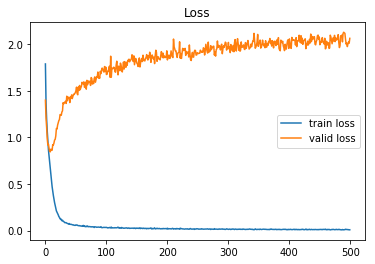

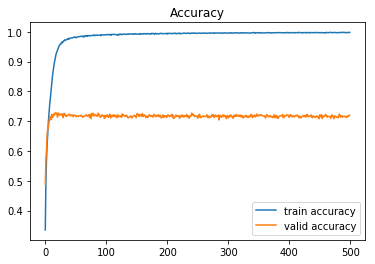

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               2097664   
__________

50000/50000 [==============================] - 6s 120us/step - loss: 2.1285 - acc: 0.2177 - val_loss: 2.0691 - val_acc: 0.2879
Epoch 45/200
50000/50000 [==============================] - 6s 121us/step - loss: 2.1226 - acc: 0.2173 - val_loss: 2.0615 - val_acc: 0.2892
Epoch 46/200
50000/50000 [==============================] - 6s 120us/step - loss: 2.1151 - acc: 0.2231 - val_loss: 2.0535 - val_acc: 0.2875
Epoch 47/200
50000/50000 [==============================] - 6s 119us/step - loss: 2.1091 - acc: 0.2236 - val_loss: 2.0464 - val_acc: 0.2901
Epoch 48/200
50000/50000 [==============================] - 6s 120us/step - loss: 2.1044 - acc: 0.2246 - val_loss: 2.0393 - val_acc: 0.2899
Epoch 49/200
50000/50000 [==============================] - 6s 120us/step - loss: 2.0961 - acc: 0.2285 - val_loss: 2.0335 - val_acc: 0.2912
Epoch 50/200
50000/50000 [==============================] - 6s 120us/step - loss: 2.0915 - acc: 0.2315 - val_loss: 2.0273 - val_acc: 0.2923
Epoch 51/200
50000/50000 [=======

50000/50000 [==============================] - 6s 119us/step - loss: 1.9289 - acc: 0.3016 - val_loss: 1.8479 - val_acc: 0.3470
Epoch 103/200
50000/50000 [==============================] - 6s 119us/step - loss: 1.9232 - acc: 0.3015 - val_loss: 1.8439 - val_acc: 0.3484
Epoch 104/200
50000/50000 [==============================] - 6s 120us/step - loss: 1.9258 - acc: 0.3030 - val_loss: 1.8417 - val_acc: 0.3529
Epoch 105/200
50000/50000 [==============================] - 6s 119us/step - loss: 1.9199 - acc: 0.3060 - val_loss: 1.8382 - val_acc: 0.3508
Epoch 106/200
50000/50000 [==============================] - 6s 120us/step - loss: 1.9174 - acc: 0.3078 - val_loss: 1.8345 - val_acc: 0.3533
Epoch 107/200
50000/50000 [==============================] - 6s 126us/step - loss: 1.9142 - acc: 0.3104 - val_loss: 1.8316 - val_acc: 0.3541
Epoch 108/200
50000/50000 [==============================] - 6s 120us/step - loss: 1.9121 - acc: 0.3075 - val_loss: 1.8281 - val_acc: 0.3544
Epoch 109/200
50000/50000 [

50000/50000 [==============================] - 6s 115us/step - loss: 1.7537 - acc: 0.3695 - val_loss: 1.6497 - val_acc: 0.4168
Epoch 161/200
50000/50000 [==============================] - 6s 115us/step - loss: 1.7499 - acc: 0.3692 - val_loss: 1.6452 - val_acc: 0.4187
Epoch 162/200
50000/50000 [==============================] - 6s 115us/step - loss: 1.7467 - acc: 0.3690 - val_loss: 1.6429 - val_acc: 0.4221
Epoch 163/200
50000/50000 [==============================] - 6s 115us/step - loss: 1.7460 - acc: 0.3679 - val_loss: 1.6389 - val_acc: 0.4202
Epoch 164/200
50000/50000 [==============================] - 6s 114us/step - loss: 1.7388 - acc: 0.3703 - val_loss: 1.6351 - val_acc: 0.4227
Epoch 165/200
50000/50000 [==============================] - 6s 116us/step - loss: 1.7362 - acc: 0.3752 - val_loss: 1.6328 - val_acc: 0.4243
Epoch 166/200
50000/50000 [==============================] - 6s 119us/step - loss: 1.7303 - acc: 0.3734 - val_loss: 1.6285 - val_acc: 0.4250
Epoch 167/200
50000/50000 [

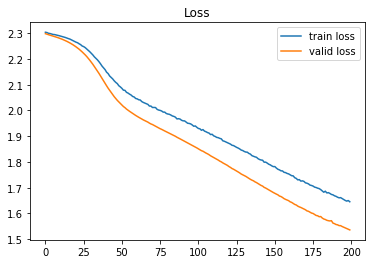

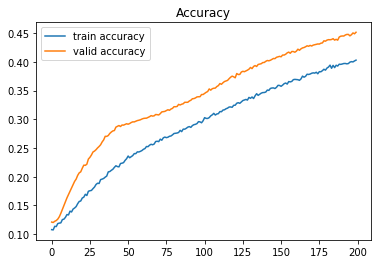

In [14]:
model = build_mlp()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.SGD(lr=0.001))
epochs = 200
model.fit(x_train, y_train, epochs= epochs, batch_size=512, validation_data=(x_test, y_test), verbose=1, shuffle=True)
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()